In [163]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from statsmodels.stats.outliers_influence import summary_table
from scipy.io import loadmat

%matplotlib inline

In [111]:
# Load GRL2016 data
infil = np.loadtxt('/home/bmoorema/Desktop/grl2016.raw')
crid = infil[:,0]
stn = infil[:,3]
mnth = infil[:,4]
day = infil[:,5]
S = infil[:,10]
alk = infil[:,15]
alk_qf = infil[:,16]

In [195]:
# Load Fraser Record
R = loadmat('/ocean/rich/home/metro/fraser/FRASER.mat')
dates = [
    datetime.datetime.fromordinal(int(mtime[0]) - 366) +
    datetime.timedelta(days=float(mtime)%1)
    for mtime in R['fraser'][0][0][1]
]
flow = R['fraser'][0][0][2]

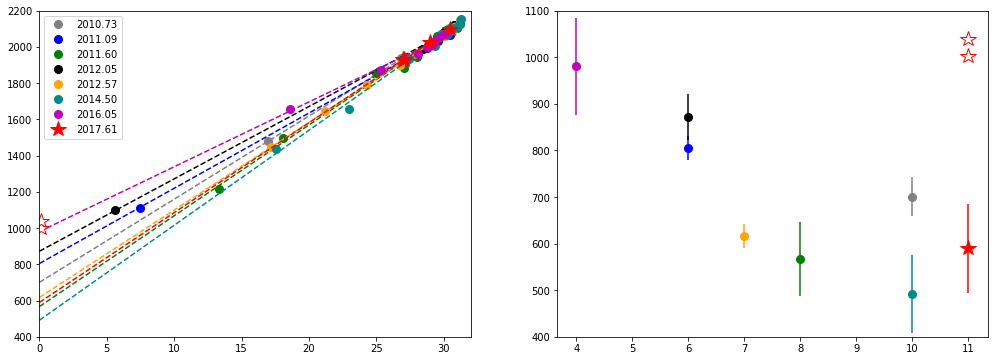

In [119]:
cruises = [2010.73, 2011.09, 2011.60, 2012.05, 2012.57, 2014.50, 2016.05, 2017.61]
stations = [39.5, 42., 39.5, 42., 39.5, 42., 42., 1.5]
colors = ['gray', 'b', 'g', 'k', 'orange', 'darkcyan', 'm', 'r']
endmembers = {}

fig, ax = plt.subplots(1, 2, figsize=(17, 6))
for cruise, station, color, flow in zip(cruises, stations, colors, flows):
    if color is 'r':
        marker = '*'
        size = 16
    else:
        marker = 'o'
        size = 8
    index = (crid == cruise) & (stn == station) & ((alk_qf == 2) | (alk_qf == 6))
    model = sm.OLS(alk[index], sm.add_constant(S[index])).fit()
    ax[0].plot(S[index], alk[index], marker=marker, color=color, markersize=size, linestyle='', label=f'{cruise:.2f}')
    ax[0].plot(np.arange(30), model.params[1] * np.arange(30) + model.params[0], linestyle='--', color=color)
    ax[0].set_xlim([0, 32])
    ax[0].set_ylim([400, 2200])
    
    ax[1].plot(mnth[index][0], model.params[0], marker=marker, color=color, markersize=size)
    ax[1].errorbar(mnth[index][0], model.params[0], model.conf_int()[0][1] - model.params[0], color=color)
    ax[1].set_ylim([400, 1100])

ax[0].plot(S[(crid == 2017.61) & (stn == 0.5)], alk[(crid == 2017.61) & (stn == 0.5)], 'r*', markerfacecolor='w', markersize=16)
ax[1].plot(mnth[(crid == 2017.61) & (stn == 0.5)], alk[(crid == 2017.61) & (stn == 0.5)], 'r*', markerfacecolor='w', markersize=16)
ax[0].legend()